In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data.csv", encoding='ISO-8859-1')
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [3]:
data.shape

(525461, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,525461.0,10.337667,107.424110,-9600.00,1.00,3.0,10.00,19152.00
Price,525461.0,4.688834,146.126914,-53594.36,1.25,2.1,4.21,25111.09
Customer ID,417534.0,15360.645478,1680.811316,12346.00,13983.00,15311.0,16799.00,18287.00


In [6]:
data = data[(data["Quantity"]>0) & (data["Price"]>0)]

In [7]:
data.isnull().sum()

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    103902
Country             0
dtype: int64

In [8]:
data.shape

(511566, 8)

In [9]:
data.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [10]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')

In [11]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [12]:
type(data['InvoiceDate'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
data.nunique()

Invoice        20952
StockCode       4251
Description     4534
Quantity         406
InvoiceDate    19468
Price           1345
Customer ID     4312
Country           40
dtype: int64

In [14]:
data['InvoiceDate'].max()

Timestamp('2010-12-09 20:01:00')

In [15]:
data["Total Price"] = data["Quantity"] * data["Price"]

In [16]:
today = data['InvoiceDate'].max() + pd.Timedelta(days=2)
today

Timestamp('2010-12-11 20:01:00')

In [19]:
data['InvoiceMonth'] = data["InvoiceDate"].dt.to_period("M")

In [20]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price,InvoiceMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2009-12
...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90,2010-12
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,2010-12
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,2010-12
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50,2010-12


In [28]:
data["Cohort"] = data.groupby("Customer ID")["InvoiceMonth"].transform('min')

In [30]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price,InvoiceMonth,Cohort
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12,2009-12


In [55]:
cohort = data.groupby(["Cohort", "InvoiceMonth"]).agg(Count = ("Customer ID", "nunique")).reset_index(drop = False)
cohort

,Cohort,InvoiceMonth,Count
0,2009-12,2009-12,955
1,2009-12,2010-01,337
2,2009-12,2010-02,319
3,2009-12,2010-03,406
4,2009-12,2010-04,363
...,...,...,...
86,2010-10,2010-11,97
87,2010-10,2010-12,35
88,2010-11,2010-11,325
89,2010-11,2010-12,35


In [56]:
cohort["Period"] = (cohort.InvoiceMonth - cohort.Cohort).apply(lambda x: x.n)

In [57]:
cohort.head()

,Cohort,InvoiceMonth,Count,Period
0,2009-12,2009-12,955,0
1,2009-12,2010-01,337,1
2,2009-12,2010-02,319,2
3,2009-12,2010-03,406,3
4,2009-12,2010-04,363,4


In [59]:
cohort_p = cohort.pivot_table(index="Cohort", columns="Period", values="Count")
cohort_p

Period,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort,,,,,,,,,,,,,
2009-12,955.0,337.0,319.0,406.0,363.0,343.0,360.0,327.0,321.0,346.0,403.0,473.0,237.0
2010-01,383.0,79.0,119.0,117.0,101.0,115.0,99.0,88.0,107.0,122.0,116.0,38.0,NaN
2010-02,374.0,89.0,84.0,109.0,92.0,75.0,72.0,107.0,95.0,103.0,27.0,NaN,NaN
2010-03,443.0,84.0,102.0,107.0,103.0,90.0,109.0,134.0,122.0,35.0,NaN,NaN,NaN
2010-04,294.0,57.0,57.0,48.0,54.0,66.0,81.0,77.0,20.0,NaN,NaN,NaN,NaN
2010-05,254.0,40.0,43.0,44.0,45.0,65.0,54.0,20.0,NaN,NaN,NaN,NaN,NaN
2010-06,270.0,47.0,51.0,55.0,62.0,77.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07,186.0,29.0,34.0,55.0,54.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,162.0,33.0,48.0,52.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
retention_mat = round(cohort_p.divide(cohort_p.iloc[:, 0], axis = 0),3)
retention_mat

Period,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort,,,,,,,,,,,,,
2009-12,1.0,0.353,0.334,0.425,0.380,0.359,0.377,0.342,0.336,0.362,0.422,0.495,0.248
2010-01,1.0,0.206,0.311,0.305,0.264,0.300,0.258,0.230,0.279,0.319,0.303,0.099,NaN
2010-02,1.0,0.238,0.225,0.291,0.246,0.201,0.193,0.286,0.254,0.275,0.072,NaN,NaN
2010-03,1.0,0.190,0.230,0.242,0.233,0.203,0.246,0.302,0.275,0.079,NaN,NaN,NaN
2010-04,1.0,0.194,0.194,0.163,0.184,0.224,0.276,0.262,0.068,NaN,NaN,NaN,NaN
2010-05,1.0,0.157,0.169,0.173,0.177,0.256,0.213,0.079,NaN,NaN,NaN,NaN,NaN
2010-06,1.0,0.174,0.189,0.204,0.230,0.285,0.067,NaN,NaN,NaN,NaN,NaN,NaN
2010-07,1.0,0.156,0.183,0.296,0.290,0.102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,1.0,0.204,0.296,0.321,0.117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


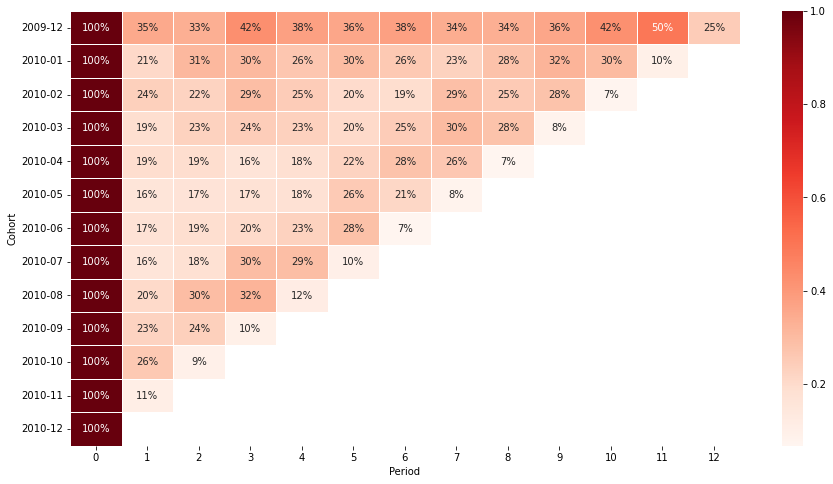

In [119]:
plt.figure(figsize=(15,8))
sns.heatmap(retention_mat, 
            mask=retention_mat.isnull(),
            annot=True, 
            cmap="Reds", 
            linewidths=.5, 
            fmt='.0%', 
            xticklabels=1, 
            yticklabels=1)
plt.show()